In [71]:
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report


In [72]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import time
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix, roc_auc_score, mean_squared_error,r2_score, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import tree
from sklearn import svm

In [73]:
covid_data = pd.read_csv("Covid Dataset (2).csv")

In [74]:
covid_data.shape

(5434, 21)

In [75]:
covid_data.columns

Index(['Breathing Problem', 'Fever', 'Dry Cough', 'Sore throat',
       'Running Nose', 'Asthma', 'Chronic Lung Disease', 'Headache',
       'Heart Disease', 'Diabetes', 'Hyper Tension', 'Fatigue ',
       'Gastrointestinal ', 'Abroad travel', 'Contact with COVID Patient',
       'Attended Large Gathering', 'Visited Public Exposed Places',
       'Family working in Public Exposed Places', 'Wearing Masks',
       'Sanitization from Market', 'COVID-19'],
      dtype='object')

In [76]:
missing_values=covid_data.isnull().sum()

percent_missing = covid_data.isnull().sum()/covid_data.shape[0]*100

value = {
    'missing_values ':missing_values,
    'percent_missing %':percent_missing
}
frame=pd.DataFrame(value)
frame

,missing_values,percent_missing %
Breathing Problem,0,0.0
Fever,0,0.0
Dry Cough,0,0.0
Sore throat,0,0.0
Running Nose,0,0.0
Asthma,0,0.0
Chronic Lung Disease,0,0.0
Headache,0,0.0
Heart Disease,0,0.0
Diabetes,0,0.0


<Axes: >

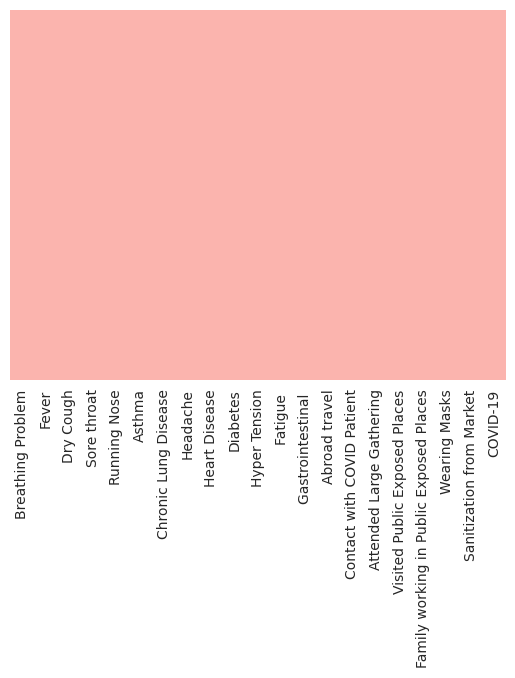

In [77]:
sns.heatmap(covid_data.isnull(),yticklabels=False,cbar=False,cmap='Pastel1')

In [78]:
e=LabelEncoder()

In [79]:
covid_data['Breathing Problem']=e.fit_transform(covid_data['Breathing Problem'])
covid_data['Fever']=e.fit_transform(covid_data['Fever'])
covid_data['Dry Cough']=e.fit_transform(covid_data['Dry Cough'])
covid_data['Sore throat']=e.fit_transform(covid_data['Sore throat'])
covid_data['Running Nose']=e.fit_transform(covid_data['Running Nose'])
covid_data['Asthma']=e.fit_transform(covid_data['Asthma'])
covid_data['Chronic Lung Disease']=e.fit_transform(covid_data['Chronic Lung Disease'])
covid_data['Headache']=e.fit_transform(covid_data['Headache'])
covid_data['Heart Disease']=e.fit_transform(covid_data['Heart Disease'])
covid_data['Diabetes']=e.fit_transform(covid_data['Diabetes'])
covid_data['Hyper Tension']=e.fit_transform(covid_data['Hyper Tension'])
covid_data['Abroad travel']=e.fit_transform(covid_data['Abroad travel'])
covid_data['Contact with COVID Patient']=e.fit_transform(covid_data['Contact with COVID Patient'])
covid_data['Attended Large Gathering']=e.fit_transform(covid_data['Attended Large Gathering'])
covid_data['Visited Public Exposed Places']=e.fit_transform(covid_data['Visited Public Exposed Places'])
covid_data['Family working in Public Exposed Places']=e.fit_transform(covid_data['Family working in Public Exposed Places'])
covid_data['Wearing Masks']=e.fit_transform(covid_data['Wearing Masks'])
covid_data['Sanitization from Market']=e.fit_transform(covid_data['Sanitization from Market'])
covid_data['COVID-19']=e.fit_transform(covid_data['COVID-19'])
covid_data['Dry Cough']=e.fit_transform(covid_data['Dry Cough'])
covid_data['Sore throat']=e.fit_transform(covid_data['Sore throat'])
covid_data['Gastrointestinal ']=e.fit_transform(covid_data['Gastrointestinal '])
covid_data['Fatigue ']=e.fit_transform(covid_data['Fatigue '])

In [80]:
x=covid_data.drop('COVID-19',axis=1)
y=covid_data['COVID-19']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 101)

In [81]:
accuracies = {}
algo_time={}
r2_scores={}
mean_squared_errors={}
roc_auc_scores={}

In [82]:
def print_performance2(yt,clf,clf_name):
    y_pred=clf.predict(x_test)
    roc_auc_scores[clf_name]=roc_auc_score(yt,y_pred)*100
    mean_squared_errors[clf_name]=mean_squared_error(yt,y_pred)*100
    r2_scores[clf_name]=r2_score(yt,y_pred)*100
    accuracies[clf_name]=clf.score(x_train,y_train)*100
    print('ROC_AUC value :',roc_auc_scores[clf_name],"%",'\n')
    print("Mean Squared Error :",mean_squared_errors[clf_name],"%")
    print("\nR2 score is :",r2_scores[clf_name],"%")
    print("\nAccuracy Score :",accuracies[clf_name],"%")
    print('\nClassification Report : ','\n',classification_report(yt,y_pred))

    confusionmatrix=confusion_matrix(yt,y_pred)

    fig, ax = plt.subplots(figsize=(3, 3))
    ax.matshow(confusionmatrix, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(confusionmatrix.shape[0]):
        for j in range(confusionmatrix.shape[1]):
            ax.text(x=j, y=i,s=confusionmatrix[i, j], va='center', ha='center', size='xx-large')

    plt.xlabel('Predictions', fontsize=18)
    plt.ylabel('Actuals', fontsize=18)
    plt.title('Confusion Matrix', fontsize=18)

## LOGISTIC REGRESSION

LOGISTIC REGRESSION
ROC_AUC value : 93.23107498945218 % 

Mean Squared Error : 3.035878564857406 %

R2 score is : 80.08627006861634 %

Accuracy Score : 97.03243616287095 %

Classification Report :  
               precision    recall  f1-score   support

           0       0.96      0.87      0.92       204
           1       0.97      0.99      0.98       883

    accuracy                           0.97      1087
   macro avg       0.97      0.93      0.95      1087
weighted avg       0.97      0.97      0.97      1087



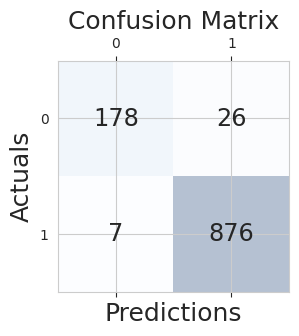

In [83]:
print("LOGISTIC REGRESSION")
start = time.time()
lr = LogisticRegression()
lr.fit(x_train, y_train)
end = time.time()

print_performance2(y_test,lr,'LOGISTIC REGRESSION')
algo_time['LOGISTIC REGRESSION']=end-start

## K-NEAREST NEIGHBOURS

> Add blockquote



In [84]:
start = time.time()
knn = KNeighborsClassifier()
param_grid = {'n_neighbors' : np.arange(1,50)}
knn_cv = GridSearchCV(knn, param_grid, cv=5)
knn_cv.fit(x_train,y_train)
end=time.time()
algo_time['K-NEAREST NEIGHBOURS']=end-start

In [85]:
print("The best paramter we have is: {}" .format(knn_cv.best_params_))
print("The best score we have achieved is: {}" .format(knn_cv.best_score_))

The best paramter we have is: {'n_neighbors': np.int64(2)}
The best score we have achieved is: 0.9802158644498233


K-NEAREST NEIGHBOURS
ROC_AUC value : 97.47213154797593 % 

Mean Squared Error : 2.5758969641214353 %

R2 score is : 83.10350187640175 %

Accuracy Score : 98.3666896710375 %

Classification Report :  
               precision    recall  f1-score   support

           0       0.90      0.98      0.93       204
           1       0.99      0.97      0.98       883

    accuracy                           0.97      1087
   macro avg       0.95      0.97      0.96      1087
weighted avg       0.98      0.97      0.97      1087



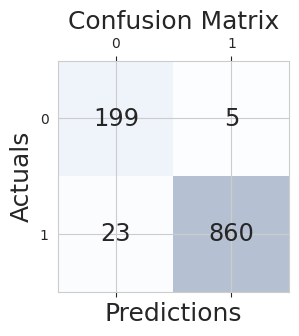

In [86]:
print("K-NEAREST NEIGHBOURS")
print_performance2(y_test,knn_cv,'K-NEAREST NEIGHBOURS')


## RANDOM FOREST

In [87]:
rf_start=time.time()
rfc=RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(x_train, y_train)
rf_end=time.time()
algo_time['RANDOM FOREST TREE']=rf_end-rf_start

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning:


100 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/uti

In [88]:
print("The best paramter we have is: {}" .format(CV_rfc.best_params_))

print("The best score we have achieved is: {}" .format(CV_rfc.best_score_*100))

The best paramter we have is: {'criterion': 'gini', 'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 200}
The best score we have achieved is: 98.20549449095935


RANDOM FOREST TREE
ROC_AUC value : 96.94474052361602 % 

Mean Squared Error : 2.2079116835326587 %

R2 score is : 85.51728732263008 %

Accuracy Score : 98.38969404186795 %

Classification Report :  
               precision    recall  f1-score   support

           0       0.93      0.96      0.94       204
           1       0.99      0.98      0.99       883

    accuracy                           0.98      1087
   macro avg       0.96      0.97      0.96      1087
weighted avg       0.98      0.98      0.98      1087



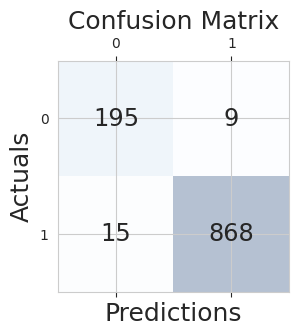

In [89]:
print("RANDOM FOREST TREE")
print_performance2(y_test,CV_rfc,'RANDOM FOREST TREE')


In [90]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

start = time.time()

svm = SVC()

param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}

svm_cv = GridSearchCV(svm, param_grid, cv=5)
svm_cv.fit(x_train, y_train)

end = time.time()
algo_time['SUPPORT VECTOR MACHINE'] = end - start

print("Best Parameters for SVM:", svm_cv.best_params_)
print("Best SVM Model Accuracy:", svm_cv.best_score_)

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

svm = SVC(probability=True)

param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
svm_cv = GridSearchCV(svm, param_grid, cv=5)
svm_cv.fit(x_train, y_train)


Best Parameters for SVM: {'C': 1, 'kernel': 'rbf'}
Best SVM Model Accuracy: 0.9838961416874991


GridSearchCV(cv=5, estimator=SVC(probability=True),
             param_grid={'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']})

SUPPORT VECTOR MACHINE
ROC_AUC value : 96.94474052361602 % 

Mean Squared Error : 2.2079116835326587 %

R2 score is : 85.51728732263008 %

Accuracy Score : 98.38969404186795 %

Classification Report :  
               precision    recall  f1-score   support

           0       0.93      0.96      0.94       204
           1       0.99      0.98      0.99       883

    accuracy                           0.98      1087
   macro avg       0.96      0.97      0.96      1087
weighted avg       0.98      0.98      0.98      1087



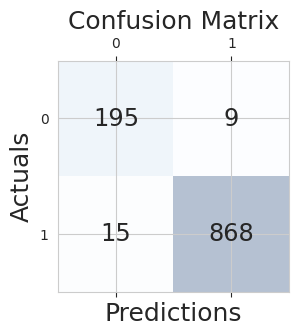

In [91]:
print("SUPPORT VECTOR MACHINE")
print_performance2(y_test, svm_cv.best_estimator_, 'SUPPORT VECTOR MACHINE')


### Naive bayes

<ipython-input-92-c7fa256a2e4b>:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-92-c7fa256a2e4b>:9: UserWarning:

The palette list has more values (7) than needed (4), which may not be intended.



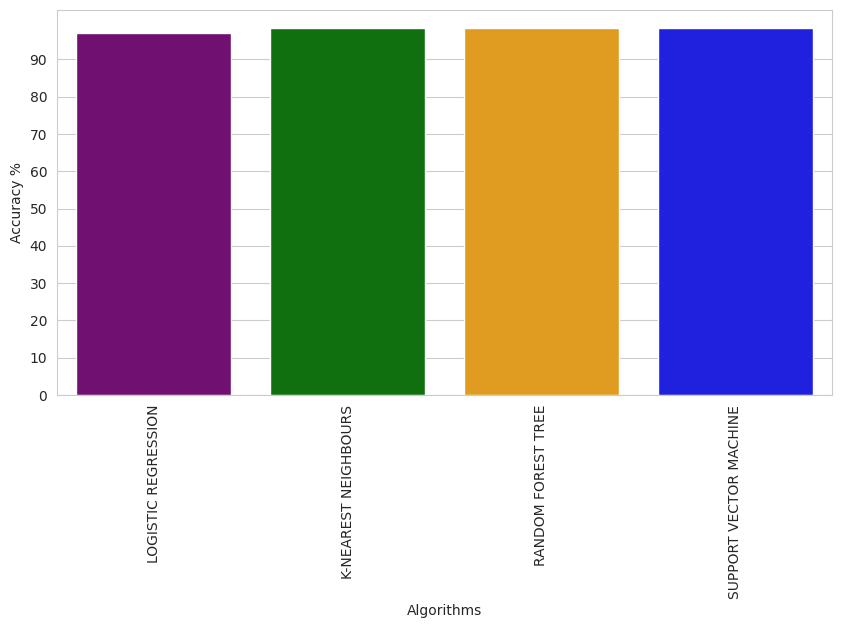

In [92]:
colors = ["purple", "green", "orange", "blue", "red", "yellow", "magenta"]

sns.set_style("whitegrid")
plt.figure(figsize=(10,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
plt.xticks(rotation=90)
ax = sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.show()

In [93]:
!conda install -c plotly plotly
!pip install colorama

/bin/bash: line 1: conda: command not found


In [94]:
import plotly.express as px
fig = px.bar(x=list(accuracies.keys()), y=list(accuracies.values()))
fig.update_traces(marker_color='teal', marker_line_color='rgb(8,48,107)', marker_line_width=1.5)
fig.update_layout(title="Accuracy Comparision", xaxis_title="Model", yaxis_title="Accuracy")
fig.show()

In [95]:
fig = px.bar(x=list(algo_time.keys()), y=list(algo_time.values()))
fig.update_traces(marker_color='teal', marker_line_color='rgb(8,48,107)', marker_line_width=1.5)
fig.update_layout(title="Algorithm Time Comparision", xaxis_title="Model", yaxis_title="")
fig.show()

In [96]:
fig = px.bar(x=list(r2_scores.keys()), y=list(r2_scores.values()))
fig.update_traces(marker_color='teal', marker_line_color='rgb(8,48,107)', marker_line_width=1.5)
fig.update_layout(title="R2 Score Comparision", xaxis_title="Model", yaxis_title="R2 Scores")
fig.show()

In [97]:
fig = px.bar(x=list(mean_squared_errors.keys()), y=list(mean_squared_errors.values()))
fig.update_traces(marker_color='teal', marker_line_color='rgb(8,48,107)', marker_line_width=1.5)
fig.update_layout(title="Mean Squared Error Comparision", xaxis_title="Model", yaxis_title="Mean Squared Error")
fig.show()

In [98]:
fig = px.bar(x=list(roc_auc_scores.keys()), y=list(roc_auc_scores.values()))
fig.update_traces(marker_color='teal', marker_line_color='rgb(8,48,107)', marker_line_width=1.5)
fig.update_layout(title="ROC Score Comparision", xaxis_title="Model", yaxis_title="ROC Scores")
fig.show()

In [99]:
import plotly.graph_objects as go
Algos=list(roc_auc_scores.keys())

fig = go.Figure(data=[
    go.Bar(name='Accuracies', x=Algos, y=list(accuracies.values())),
    go.Bar(name='R2 scores', x=Algos, y=list(r2_scores.values())),
    go.Bar(name='Mean Squared Errors', x=Algos, y=list(mean_squared_errors.values())),
    go.Bar(name='ROC Auc Scores', x=Algos, y=list(roc_auc_scores.values()))
])
fig.update_layout(barmode='group')
fig.show()

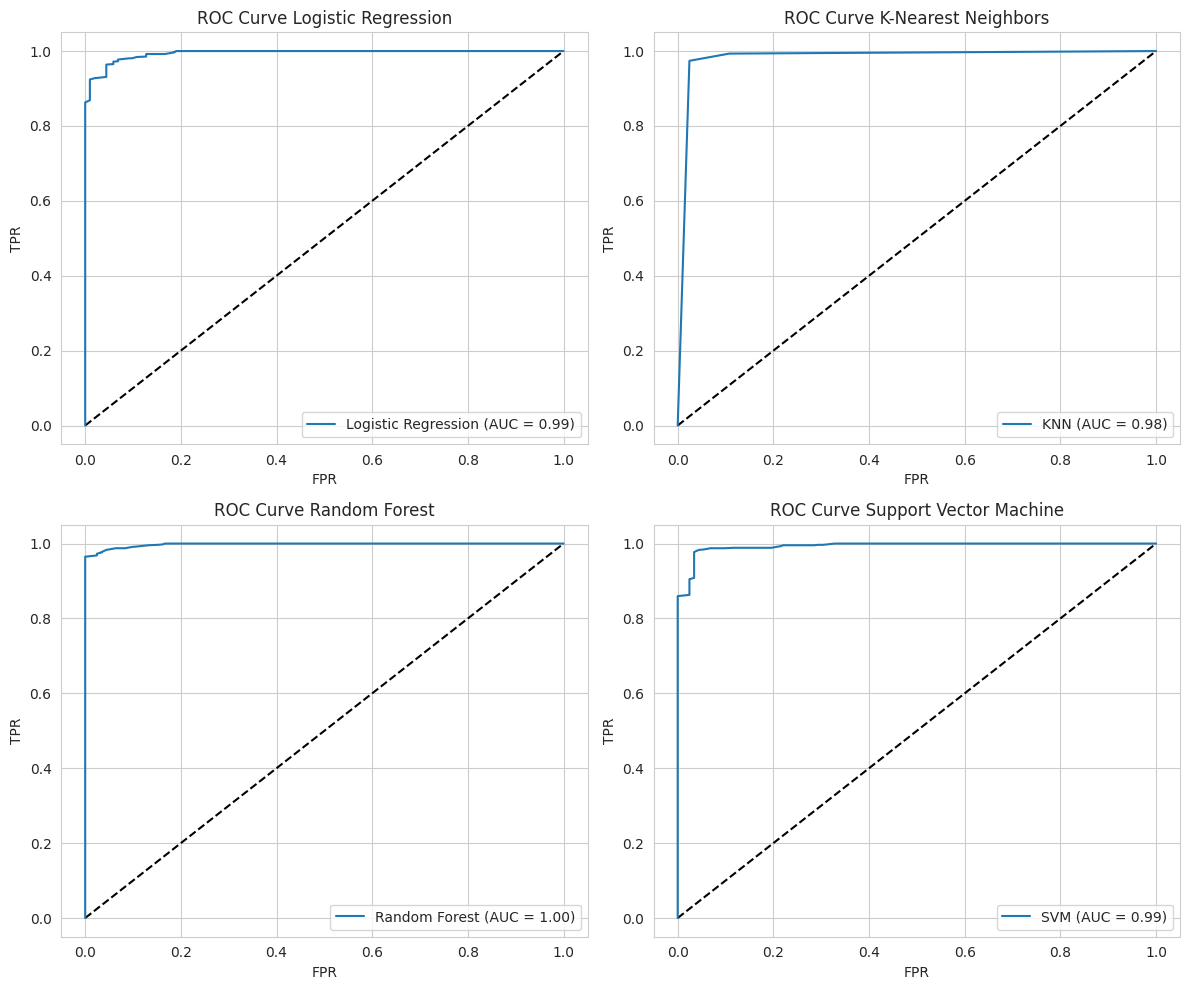

In [100]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
Y_predict1_proba = lr.predict_proba(x_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, Y_predict1_proba)
plt.subplot(2, 2, 1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {auc(fpr, tpr):.2f})')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve Logistic Regression')
plt.legend()
plt.grid(True)

Y_predict1_proba = knn_cv.predict_proba(x_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, Y_predict1_proba)
plt.subplot(2, 2, 2)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label=f'KNN (AUC = {auc(fpr, tpr):.2f})')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve K-Nearest Neighbors')
plt.legend()
plt.grid(True)

Y_predict1_proba = CV_rfc.predict_proba(x_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, Y_predict1_proba)
plt.subplot(2, 2, 3)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {auc(fpr, tpr):.2f})')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve Random Forest')
plt.legend()
plt.grid(True)

Y_predict1_proba = svm_cv.best_estimator_.predict_proba(x_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, Y_predict1_proba)
plt.subplot(2, 2, 4)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label=f'SVM (AUC = {auc(fpr, tpr):.2f})')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve Support Vector Machine')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [101]:
from colorama import Fore
import numpy as np
import pandas as pd
from sklearn.ensemble import VotingClassifier

print("COVID PREDICTION BASED ON ML ALGORITHMS")
print("Enter 1 for Yes and 0 for No")

Breathing_Problem = int(input("Does the patient have breathing problem? "))
Fever = int(input("Does the patient have fever? "))
Dry_Cough = int(input("Does the patient have dry cough? "))
Sore_throat = int(input("Does the patient have sore throat? "))
Running_Nose = int(input("Does the patient have running nose? "))
Asthma = int(input("Does the patient have any record of asthma? "))
Chronic_Lung_Disease = int(input("Does the patient have any records of chronic lung disease? "))
Headache = int(input("Is the patient having headache? "))
Heart_Disease = int(input("Does the patient have any record of any heart disease? "))
Diabetes = int(input("Does the patient have diabetes? "))
Hyper_Tension = int(input("Does the patient have hyper tension? "))
Fatigue = int(input("Does the patient experience fatigue? "))
Gastrointestinal = int(input("Does the patient have any gastrointestinal disorders? "))
Abroad_travel = int(input("Has the patient travelled abroad recently? "))
Contact_with_COVID_Patient = int(input("Was the patient in contact with a COVID patient recently? "))
Attended_Large_Gathering = int(input("Did the patient attend any large gathering event recently? "))
Visited_Public_Exposed_Places = int(input("Did the patient visit any public exposed places recently? "))
Family_working_in_Public_Exposed_Places = int(input("Does the patient have any family member working in public exposed places? "))
Wearing_mask = int(input("Does the patient wear a mask daily? "))
Sanitization_from_Market = int(input("Does the patient sanitize hands regularly? "))

feature_names = x_train.columns
patient_df = pd.DataFrame([[Breathing_Problem, Fever, Dry_Cough, Sore_throat, Running_Nose, Asthma,
                            Chronic_Lung_Disease, Headache, Heart_Disease, Diabetes, Hyper_Tension,
                            Fatigue, Gastrointestinal, Abroad_travel, Contact_with_COVID_Patient,
                            Attended_Large_Gathering, Visited_Public_Exposed_Places,
                            Family_working_in_Public_Exposed_Places, Wearing_mask, Sanitization_from_Market]],
                          columns=feature_names)

models = [
    ('Logistic Regression', lr),
    ('KNN', knn_cv),
    ('SVM', svm_cv.best_estimator_),
    ('Random Forest', CV_rfc)
]

ensemble = VotingClassifier(estimators=models, voting='hard')
ensemble.fit(x_train, y_train)

result = ensemble.predict(patient_df)

print("\nPredicted Result:", result)

if result == 1:
    print(Fore.RED + "You may be affected with COVID-19! Please get an RTPCR test ASAP and stay in quarantine for 14 days!")
else:
    print(Fore.GREEN + "You do not show symptoms of COVID-19. Stay home! Stay safe!")


COVID PREDICTION BASED ON ML ALGORITHMS
Enter 1 for Yes and 0 for No
Does the patient have breathing problem? 1
Does the patient have fever? 1
Does the patient have dry cough? 1
Does the patient have sore throat? 0
Does the patient have running nose? 0
Does the patient have any record of asthma? 0
Does the patient have any records of chronic lung disease? 0
Is the patient having headache? 0
Does the patient have any record of any heart disease? 0
Does the patient have diabetes? 0
Does the patient have hyper tension? 0
Does the patient experience fatigue? 0
Does the patient have any gastrointestinal disorders? 0
Has the patient travelled abroad recently? 0
Was the patient in contact with a COVID patient recently? 0
Did the patient attend any large gathering event recently? 0
Did the patient visit any public exposed places recently? 0
Does the patient have any family member working in public exposed places? 0
Does the patient wear a mask daily? 0
Does the patient sanitize hands regularly

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning:


100 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/uti


Predicted Result: [1]
You may be affected with COVID-19! Please get an RTPCR test ASAP and stay in quarantine for 14 days!


In [105]:
import joblib

In [106]:
joblib.dump(ensemble,'covid_model.pkl')

['covid_model.pkl']

In [107]:
from google.colab import files
files.download("covid_model.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>